# Aplicación de K-Means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

<h2>Lectura de datos</h2>

In [3]:
vinos = pd.read_csv('data_vinos.csv')
vinos.head()

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
vinos_variables = vinos.drop(['Vino'], axis = 1)
vinos_variables.describe(percentiles=[0.05,0.25,0.5,0.75,0.90,0.99]).T
# Podemos ver que tenemos datos que varian muchisimo en su minimos y sus maximos, por lo que tendremos que normalizarlos

,count,mean,std,min,5%,25%,50%,75%,90%,99%,max
Alcohol,178.0,13.000618,0.811827,11.03,11.6585,12.3625,13.050,13.6775,14.100,14.4728,14.83
Malic,178.0,2.336348,1.117146,0.74,1.0610,1.6025,1.865,3.0825,3.983,5.5422,5.80
Ash,178.0,2.366517,0.274344,1.36,1.9200,2.2100,2.360,2.5575,2.700,2.9890,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,14.7700,17.2000,19.500,21.5000,24.000,28.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,80.8500,88.0000,98.000,107.0000,118.000,141.7600,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.3800,1.7425,2.355,2.8000,3.044,3.5959,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,0.5455,1.2050,2.135,2.8750,3.233,3.7914,5.08
Nonflavanoids,178.0,0.361854,0.124453,0.13,0.1900,0.2700,0.340,0.4375,0.530,0.6300,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,0.7300,1.2500,1.555,1.9500,2.305,3.0336,3.58
Color,178.0,5.058090,2.318286,1.28,2.1140,3.2200,4.690,6.2000,8.530,11.0185,13.00


In [16]:
vinos_normalizados = (vinos_variables - vinos_variables.min())/(vinos_variables.max() - vinos_variables.min())
vinos_normalizados.describe(percentiles=[0.05,0.25,0.5,0.75,0.90,0.99]).T
#vinos_normalizados.head()

,count,mean,std,min,5%,25%,50%,75%,90%,99%,max
Alcohol,178.0,0.518584,0.213639,0.0,0.165395,0.350658,0.531579,0.696711,0.807895,0.906000,1.0
Malic,178.0,0.315484,0.220780,0.0,0.063439,0.170455,0.222332,0.462945,0.640909,0.949051,1.0
Ash,178.0,0.538244,0.146708,0.0,0.299465,0.454545,0.534759,0.640374,0.716578,0.871123,1.0
Alcalinity,178.0,0.458502,0.172142,0.0,0.214948,0.340206,0.458763,0.561856,0.690722,0.922680,1.0
Magnesium,178.0,0.323278,0.155244,0.0,0.117935,0.195652,0.304348,0.402174,0.521739,0.780000,1.0
Phenols,178.0,0.453487,0.215811,0.0,0.137931,0.262931,0.474138,0.627586,0.711724,0.902034,1.0
Flavanoids,178.0,0.356386,0.210730,0.0,0.043354,0.182489,0.378692,0.534810,0.610338,0.728143,1.0
Nonflavanoids,178.0,0.437460,0.234818,0.0,0.113208,0.264151,0.396226,0.580189,0.754717,0.943396,1.0
Proanthocyanins,178.0,0.372523,0.180555,0.0,0.100946,0.264984,0.361199,0.485804,0.597792,0.827634,1.0
Color,178.0,0.322363,0.197806,0.0,0.071160,0.165529,0.290956,0.419795,0.618601,0.830930,1.0


## Busqueda optima de clusters

In [10]:
wcss = []            # Es la medida de la suma de las distancias de las observaciones desde sus centroides de grupo.
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter= 300)
    kmeans.fit(vinos_normalizados)
    wcss.append(kmeans.inertia_)

c:\Users\jeflores\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


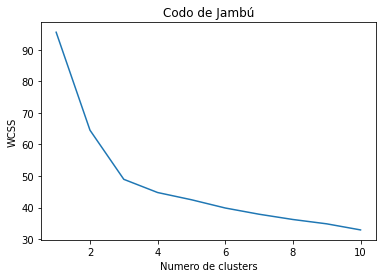

In [11]:
plt.plot(range(1,11), wcss)
plt.title("Codo de Jambú")
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS');

In [12]:
modelos_clust = KMeans(n_clusters = 3, max_iter= 300)
modelos_clust.fit_predict(vinos_normalizados)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [13]:
vinos['KMeans_Clusters'] = modelos_clust.labels_
vinos

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,KMeans_Clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,174,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,175,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,176,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,177,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


## Aplicamos PCA para poder graficar en dos dimensiones

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_vinos = pca.fit_transform(vinos_normalizados)

pca_vinos_df = pd.DataFrame(data = pca_vinos, columns = ['Componente_1', 'Componente_2'])

pca_nombres_vinos = pd.concat([pca_vinos_df, vinos[['KMeans_Clusters']]], axis=1)
pca_nombres_vinos

,Componente_1,Componente_2,KMeans_Clusters
0,-0.706336,-0.253193,1
1,-0.484977,-0.008823,1
2,-0.521172,-0.189187,1
3,-0.821644,-0.580906,1
4,-0.202546,-0.059467,1
...,...,...,...
173,0.739510,-0.471901,0
174,0.581781,-0.348366,0
175,0.626313,-0.546857,0
176,0.572991,-0.425516,0


## Visualización de datos

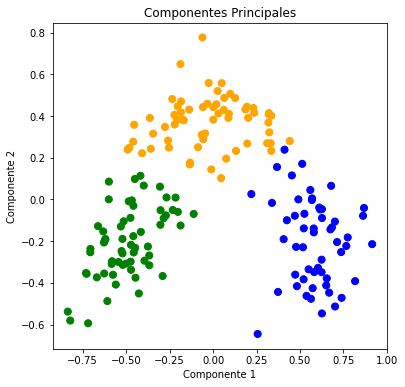

In [15]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)
ax.set_title('Componentes Principales')
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')

color_theme = np.array(['blue','green','orange'])
#color_theme = np.array(['blue','green','orange','red','yellow'])

ax.scatter(x = pca_nombres_vinos.Componente_1, y = pca_nombres_vinos.Componente_2,
           c=color_theme[pca_nombres_vinos.KMeans_Clusters], s = 50)

## Cluster breast_cancer

In [56]:
from sklearn import datasets

In [57]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
features=data.data

In [58]:
df_features=pd.DataFrame(features)
df_features

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [59]:
df_features.describe().T

,count,mean,std,min,25%,50%,75%,max
0,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
1,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
2,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
3,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
4,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
5,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
6,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
7,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
8,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
9,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()
features_scaled=scaler.fit_transform(df_features)

In [62]:
df_features_scaled=pd.DataFrame(features_scaled)
df_features_scaled

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [63]:
df_features_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
0,569.0,-3.162867e-15,1.00088,-2.029648,-0.689385,-0.215082,0.469393,3.971288
1,569.0,-6.530609e-15,1.00088,-2.229249,-0.725963,-0.104636,0.584176,4.651889
2,569.0,-7.078891e-16,1.00088,-1.984504,-0.691956,-0.235980,0.499677,3.976130
3,569.0,-8.799835e-16,1.00088,-1.454443,-0.667195,-0.295187,0.363507,5.250529
4,569.0,6.132177e-15,1.00088,-3.112085,-0.710963,-0.034891,0.636199,4.770911
5,569.0,-1.120369e-15,1.00088,-1.610136,-0.747086,-0.221940,0.493857,4.568425
6,569.0,-4.421380e-16,1.00088,-1.114873,-0.743748,-0.342240,0.526062,4.243589
7,569.0,9.732500e-16,1.00088,-1.261820,-0.737944,-0.397721,0.646935,3.927930
8,569.0,-1.971670e-15,1.00088,-2.744117,-0.703240,-0.071627,0.530779,4.484751
9,569.0,-1.453631e-15,1.00088,-1.819865,-0.722639,-0.178279,0.470983,4.910919


In [64]:
wcss = []            # Es la medida de la suma de las distancias de las observaciones desde sus centroides de grupo.
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter= 300)
    kmeans.fit(df_features_scaled)
    wcss.append(kmeans.inertia_)

c:\Users\jeflores\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Text(0, 0.5, 'WCSS')

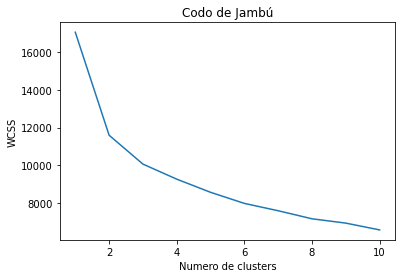

In [65]:
plt.plot(range(1,11), wcss)
plt.title("Codo de Jambú")
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')

In [66]:
cluster2 = KMeans(n_clusters = 3, max_iter= 300)
cluster2.fit_predict(df_features_scaled)

array([2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 2, 1, 1, 1,
       0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0,
       1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 1, 0, 2, 2, 1, 2, 1, 2,
       1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 2, 2,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       0, 1, 2, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1,
       2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,

In [68]:
# disponer del número de cluster al dataset origina
df_features['KMeans_Clusters'] = cluster2.labels_
df_features

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,KMeans_Clusters
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,2
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,2
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,2
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,2
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,2
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,2


In [69]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_dianostic = pca.fit_transform(features_scaled)

df_pca = pd.DataFrame(data = pca_dianostic, columns = ['Componente_1', 'Componente_2'])

df_pca_cluster= pd.concat([df_pca, df_features[['KMeans_Clusters']]], axis=1)
df_pca_cluster

,Componente_1,Componente_2,KMeans_Clusters
0,9.192837,1.948583,2
1,2.387802,-3.768172,2
2,5.733896,-1.075174,2
3,7.122953,10.275589,0
4,3.935302,-1.948072,2
...,...,...,...
564,6.439315,-3.576817,2
565,3.793382,-3.584048,2
566,1.256179,-1.902297,1
567,10.374794,1.672010,2


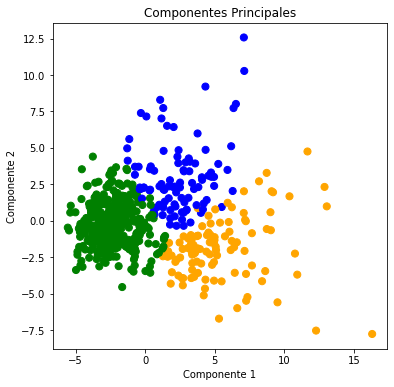

In [70]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)
ax.set_title('Componentes Principales')
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')

color_theme = np.array(['blue','green','orange'])
#color_theme = np.array(['blue','green','orange','red','yellow'])

ax.scatter(x = df_pca_cluster.Componente_1, y = df_pca_cluster.Componente_2,
           c=color_theme[df_pca_cluster.KMeans_Clusters], s = 50)

In [71]:
df_features

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,KMeans_Clusters
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,2
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,2
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,2
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,2
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,2
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,2


In [79]:
target=data.target
target=pd.DataFrame(target)
target.head()

,0
0,0
1,0
2,0
3,0
4,0


In [82]:
df_all=pd.concat([df_features,target], axis=1)
df_all

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,KMeans_Clusters,0
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,2,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,2,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,2,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,2,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,2,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,2,0


In [83]:
df_all.to_csv("cluster2.csv")